##  [Introduction](#)

Netflix has transformed the way the world watches stories — evolving from a DVD rental company to one of the largest global streaming platforms. With a vast and ever-changing content library, analyzing Netflix’s data offers valuable insights into how, what, and where they publish.

In this project, I conducted a detailed exploratory data analysis (EDA) on the **Netflix Titles Dataset**, aiming to uncover trends in content type, genre, global reach, and temporal patterns. Along the way, I applied a combination of **statistical techniques**, **visual storytelling**, and even **machine learning** to draw deeper insights.

This notebook combines classic visualizations with rare and advanced ones to deliver a thoughtful and holistic analysis of Netflix’s digital content empire.


# 🎬 Netflix Shows Data Analysis  
*Exploring Content Trends on Netflix (EDA Project)*  
By G.N. Himaja – ShadowFox Data Science Intern  


##  Research Questions

To understand Netflix's evolution as a global streaming platform, I explored the following questions:

1. **How has Netflix's content grown over time?**
2. **What genres, countries, and directors dominate the platform?**
3. **How do content durations vary across genres and types (Movie vs Show)?**
4. **Are there patterns in when Netflix uploads content? (by month, weekday, and year)**
5. **What is the time gap between content release and its Netflix appearance?**
6. **Which actors and directors appear most frequently?**
7. **Are there correlations between content attributes (e.g., duration, release year)?**
8. **Can content genres be clustered using machine learning (TF-IDF + KMeans)?**
9. **How does Netflix distribute content across multiple genres or countries?**
10. **What insights can we gain through advanced visualizations like network graphs, heatmaps, and stacked area charts?**

These questions helped me structure my exploratory data analysis and uncover rich patterns across Netflix’s global content offerings.

In [2]:
#Import and Load Data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import pandas as pd

# Replace with your uploaded filename
df = pd.read_csv("/content/netflix_titles.csv.zip")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
# Clean and Prepare data
# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed', errors='coerce')

# Extract year
df['year_added'] = df['date_added'].dt.year

# Drop rows with missing year after conversion
df = df.dropna(subset=['year_added'])

# Preview cleaned data
df[['title', 'type', 'country', 'release_year', 'year_added']].head()

,title,type,country,release_year,year_added
0,Dick Johnson Is Dead,Movie,United States,2020,2021.0
1,Blood & Water,TV Show,South Africa,2021,2021.0
2,Ganglands,TV Show,NaN,2021,2021.0
3,Jailbirds New Orleans,TV Show,NaN,2021,2021.0
4,Kota Factory,TV Show,India,2021,2021.0


###  [Shows Added by Year](#)  
We begin by visualizing how Netflix has grown over time in terms of total content uploads and differentiating between Movies and TV Shows.

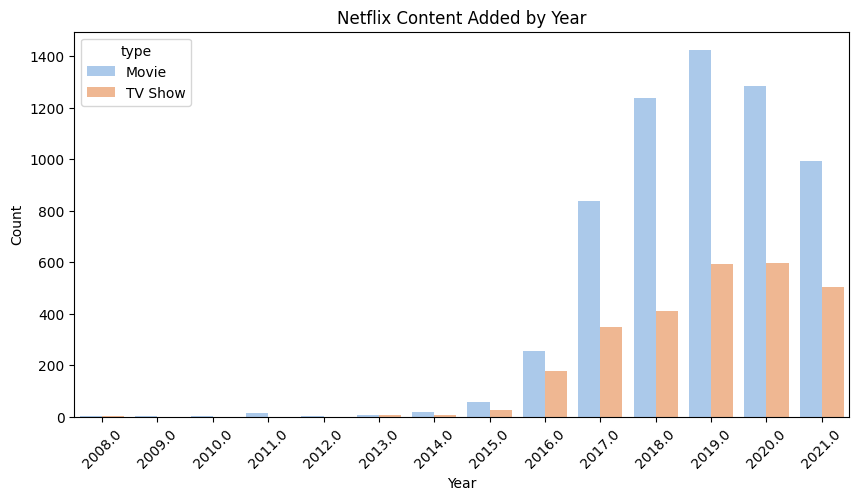

In [8]:
#Shows added by year
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='year_added', hue='type', palette='pastel')
plt.title("Netflix Content Added by Year")
plt.xticks(rotation=45)
plt.ylabel("Count")
plt.xlabel("Year")
plt.show()

###  [Top Genres](#)  
This bar chart showcases the most popular genres available on Netflix based on frequency. Genres are extracted and cleaned from the 'listed_in' column.

/tmp/ipython-input-9-1142619701.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette="rocket")


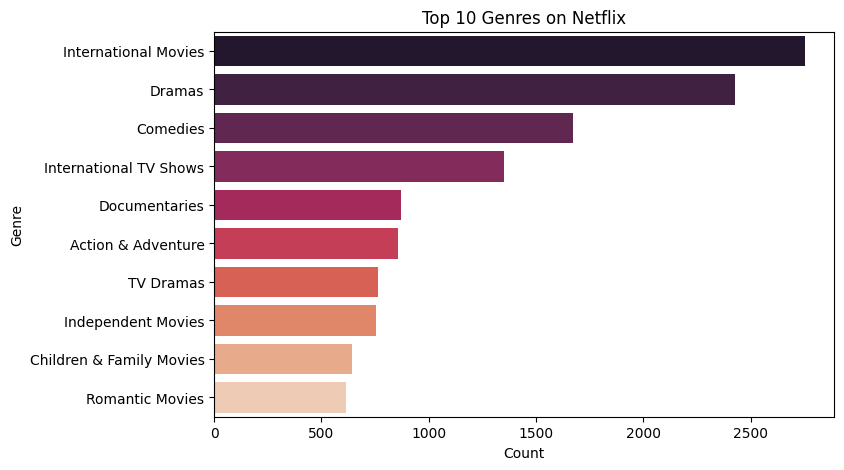

In [9]:
#Top genres
# Split genres
df['listed_in'] = df['listed_in'].astype(str)
genres = df['listed_in'].str.split(', ').explode()

top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(y=top_genres.index, x=top_genres.values, palette="rocket")
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

###  [Top Countries](#)  
Which countries produce the most Netflix content? This chart breaks down the top 10 contributors globally.

/tmp/ipython-input-10-966022816.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


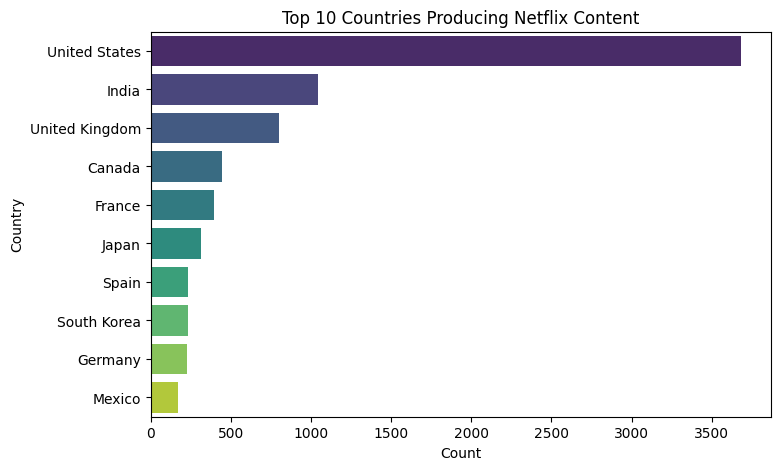

In [10]:
#Top countries
countries = df['country'].dropna().str.split(', ').explode()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

###  [Analysis by Content Duration](#)  
Here we analyze how long Netflix movies typically run, showing the distribution of durations using histogram and violin plots.


/tmp/ipython-input-11-1501043527.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)


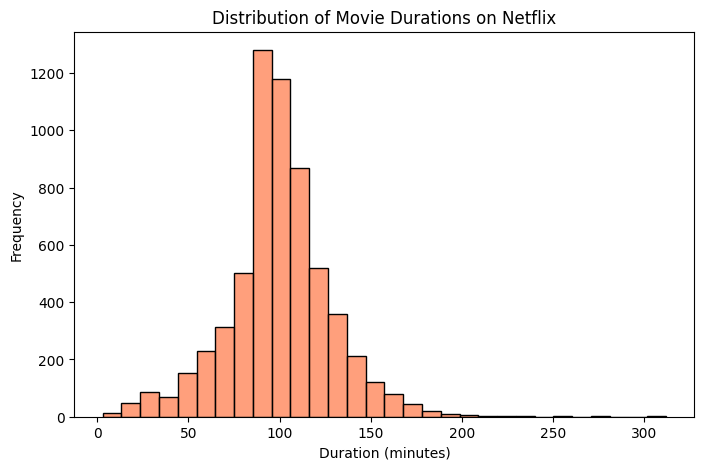

In [11]:
#Analysis by Content Duration
# Filter only movies
movies = df[df['type'] == 'Movie']

# Extract numeric duration
movies['duration_minutes'] = movies['duration'].str.replace(' min', '').astype(float)

# Plot distribution
plt.figure(figsize=(8,5))
sns.histplot(movies['duration_minutes'], bins=30, color='coral')
plt.title("Distribution of Movie Durations on Netflix")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()

###  [Most Common Actors](#)  
Using text explosion and frequency analysis, we identify the actors who appear most frequently across Netflix titles.



/tmp/ipython-input-12-2338836801.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')


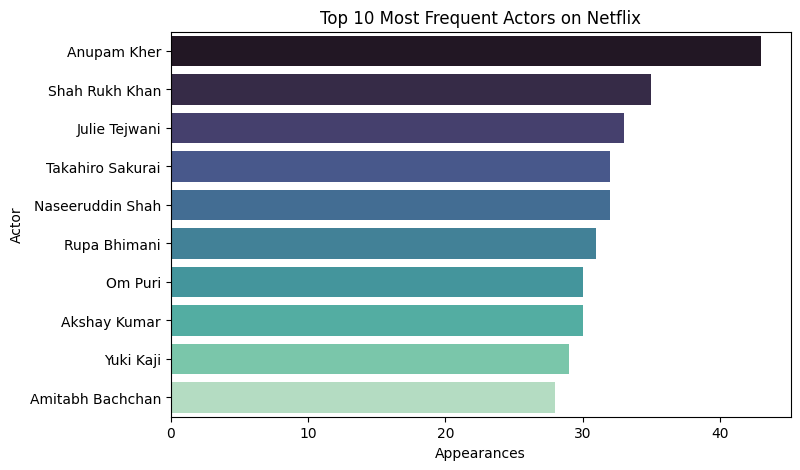

In [12]:
#Most Common Actors
# Explode actors
actors = df['cast'].dropna().str.split(', ').explode()
top_actors = actors.value_counts().head(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_actors.values, y=top_actors.index, palette='mako')
plt.title("Top 10 Most Frequent Actors on Netflix")
plt.xlabel("Appearances")
plt.ylabel("Actor")
plt.show()

###  [Time Series of Content Growth](#)  
This line plot helps visualize how content volume has changed yearly, giving us a sense of Netflix’s expansion curve.

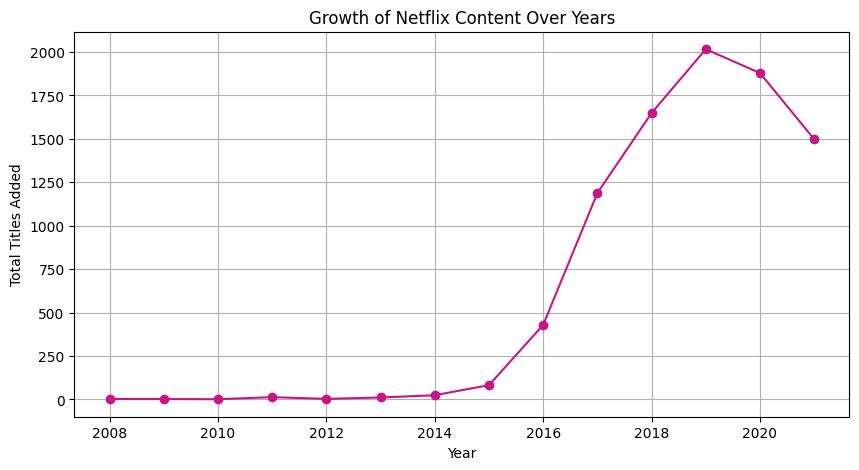

In [13]:
#Time Series of Content Growth (line plot)
content_by_year = df.groupby('year_added').size()

plt.figure(figsize=(10,5))
content_by_year.plot(kind='line', marker='o', color='mediumvioletred')
plt.title("Growth of Netflix Content Over Years")
plt.xlabel("Year")
plt.ylabel("Total Titles Added")
plt.grid(True)
plt.show()

###  [Simple Correlation Heatmap](#)  
A basic heatmap to explore correlations between numeric features like release year, addition year, and movie duration.

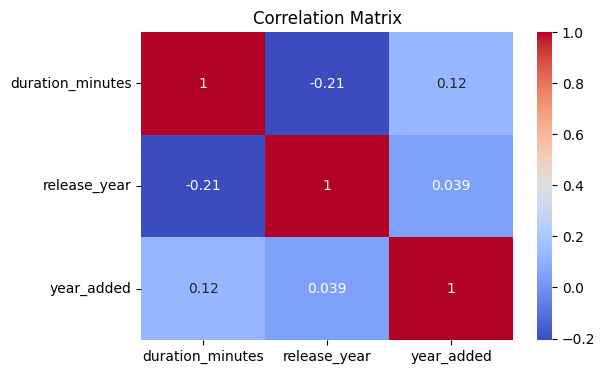

In [14]:
#Simple Correlation Heatmap
# Prepare data for correlation
corr_df = movies[['duration_minutes', 'release_year', 'year_added']].dropna()

plt.figure(figsize=(6,4))
sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

###  [Heatmap: Content by Year & Month](#)  
We visualize how many shows were added in each month across all years — a good indicator of peak seasons.

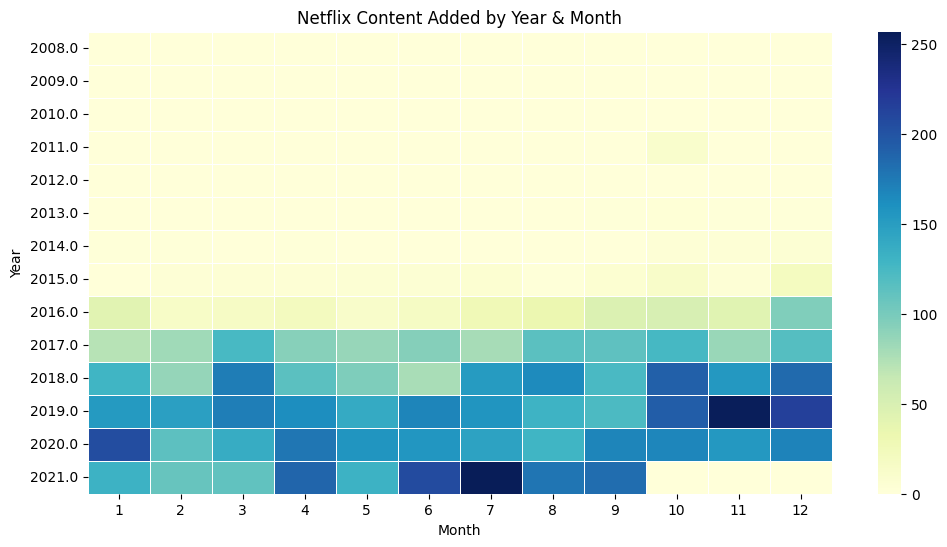

In [16]:
#Heatmap: Content Added by Year & Month
# Extract month
df['month_added'] = df['date_added'].dt.month

content_month_year = df.groupby(['year_added', 'month_added']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.heatmap(content_month_year, cmap='YlGnBu', linewidths=0.5)
plt.title("Netflix Content Added by Year & Month")
plt.xlabel("Month")
plt.ylabel("Year")
plt.show()

###  [WordCloud of Titles](#)  
A fun and visual way to highlight commonly recurring words in Netflix titles.


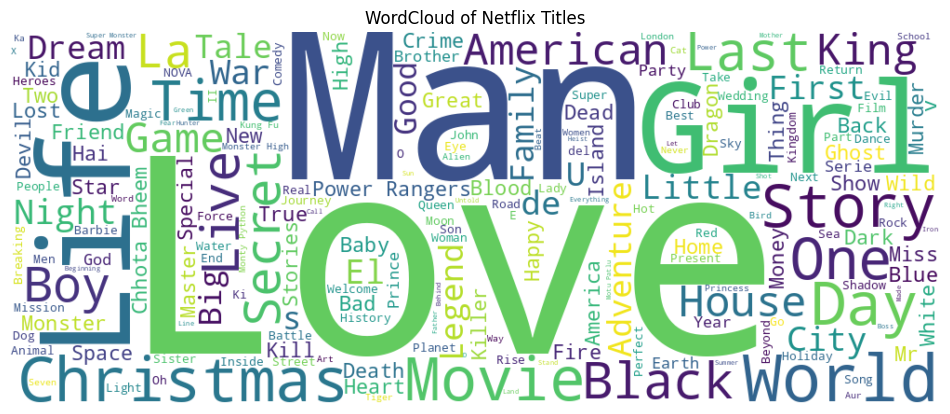

In [17]:
#WordCloud: Most Common Titles
from wordcloud import WordCloud
all_titles = " ".join(df['title'].dropna().astype(str))
wordcloud = WordCloud(width=1000, height=400, background_color='white').generate(all_titles)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud of Netflix Titles")
plt.show()

###  [Violin Plot: Movie Durations](#)  
A violin plot reveals the density distribution of movie durations — ideal for spotting consistency or outliers.


/tmp/ipython-input-18-1357401696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df[df['type'] == 'Movie'], x='type', y='duration_num', palette='husl')


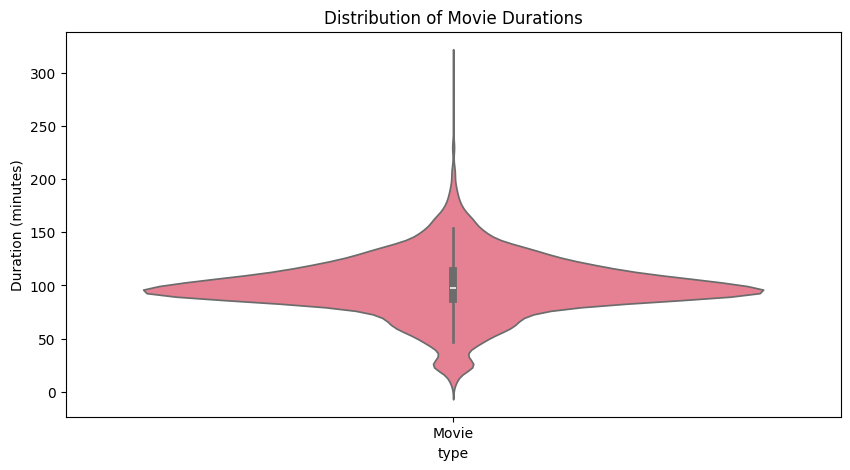

In [18]:
#Violin Plot: Distribution of Movie Durations
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
df['duration_type'] = df['duration'].str.extract('([a-zA-Z]+)')

plt.figure(figsize=(10, 5))
sns.violinplot(data=df[df['type'] == 'Movie'], x='type', y='duration_num', palette='husl')
plt.title("Distribution of Movie Durations")
plt.ylabel("Duration (minutes)")
plt.show()

### [Years Between Release and Addition](#)  
How long does it take for a movie/show to get added to Netflix after release? This histogram uncovers that timeline.


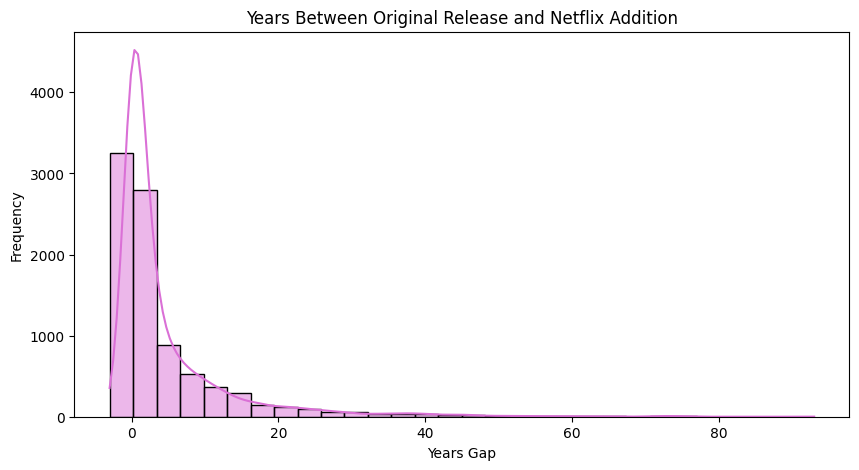

In [19]:
#Years Between Release and Netflix Addition
df['gap_to_netflix'] = df['year_added'] - df['release_year']
plt.figure(figsize=(10, 5))
sns.histplot(df['gap_to_netflix'].dropna(), bins=30, kde=True, color='orchid')
plt.title("Years Between Original Release and Netflix Addition")
plt.xlabel("Years Gap")
plt.ylabel("Frequency")
plt.show()

###  [Bar Chart: Content by Weekday](#)  
Which days of the week does Netflix tend to upload content? This bar chart reveals temporal content patterns.

/tmp/ipython-input-20-3723837433.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_data.index, y=weekday_data.values, palette='cubehelix')


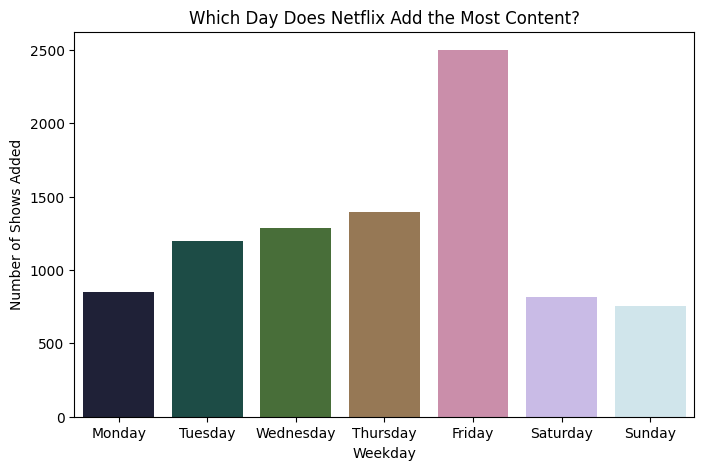

In [20]:
#Bar Chart: Content Added by Weekday
df['weekday_added'] = df['date_added'].dt.day_name()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_data = df['weekday_added'].value_counts().reindex(weekday_order)

plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_data.index, y=weekday_data.values, palette='cubehelix')
plt.title("Which Day Does Netflix Add the Most Content?")
plt.ylabel("Number of Shows Added")
plt.xlabel("Weekday")
plt.show()

### [Director Analysis](#)  
This visualization identifies the top 10 most frequent directors on Netflix by number of titles.

/tmp/ipython-input-21-108543345.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')


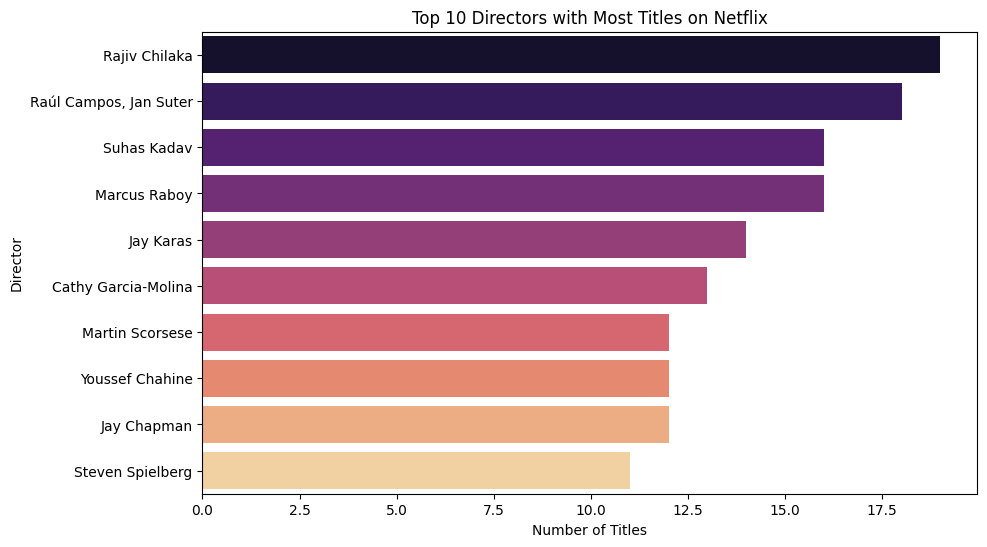

In [21]:
#Director Analysis
# Top 10 most frequent directors
top_directors = df['director'].value_counts().head(10)

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title("Top 10 Directors with Most Titles on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()

###  [Multi-country & Multi-genre Analysis](#)  
Some content belongs to multiple genres or countries — we visualize their complexity through explosion and counts.

In [22]:
#Multi-country & Multi-genre Analysis
# Count how many titles are tagged with multiple countries
df['num_countries'] = df['country'].fillna('').apply(lambda x: len(x.split(',')))
multi_country_count = (df['num_countries'] > 1).sum()

# Percentage
print(f"Titles with multiple countries: {multi_country_count} / {len(df)} ({(multi_country_count/len(df))*100:.2f}%)")

Titles with multiple countries: 1320 / 8797 (15.01%)


###  [Duration Distribution by Genre](#)  
We analyze how content length varies across top genres — combining distribution analysis with grouping.


/tmp/ipython-input-23-3631252694.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)
/tmp/ipython-input-23-3631252694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_df['main_genre'] = movie_df['listed_in'].str.split(',').str[0]


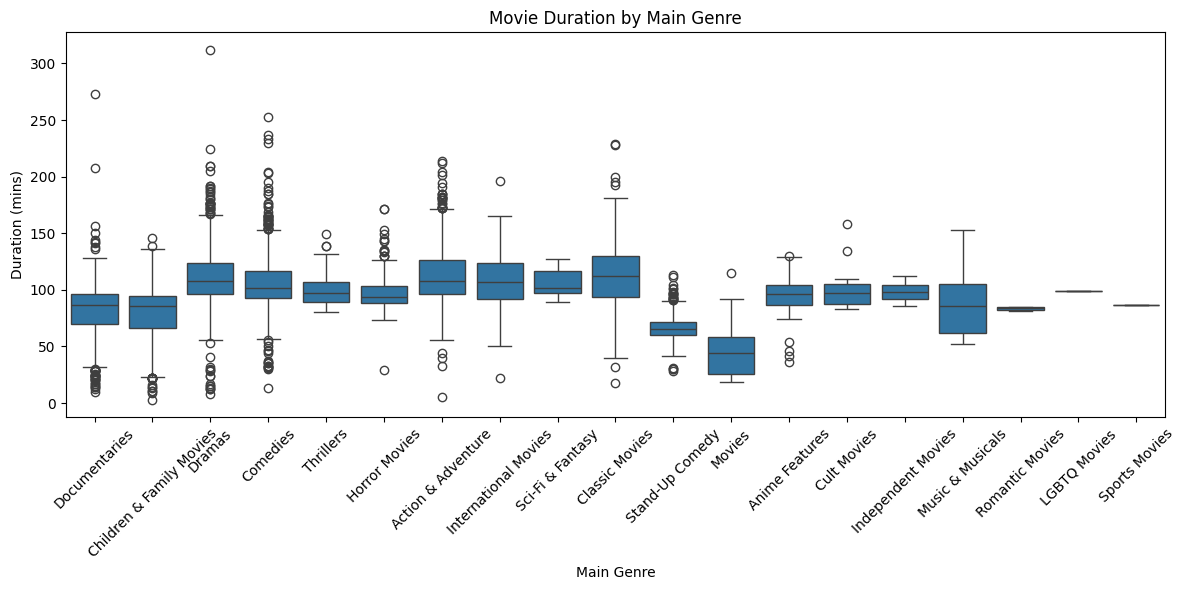

In [23]:
# Duration Distribution by Genre
# Filter only movies
movie_df = df[df['type'] == 'Movie']

# Clean duration column
movie_df['duration_mins'] = movie_df['duration'].str.replace(' min', '').astype(float)

# Use most common genre (first in list)
movie_df['main_genre'] = movie_df['listed_in'].str.split(',').str[0]

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=movie_df, x='main_genre', y='duration_mins')
plt.xticks(rotation=45)
plt.title("Movie Duration by Main Genre")
plt.ylabel("Duration (mins)")
plt.xlabel("Main Genre")
plt.tight_layout()
plt.show()

### [Monthly Upload Trend](#)  
A grouped bar chart showing how many titles were uploaded each month — revealing patterns in scheduling.


/tmp/ipython-input-24-371578773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette="coolwarm")


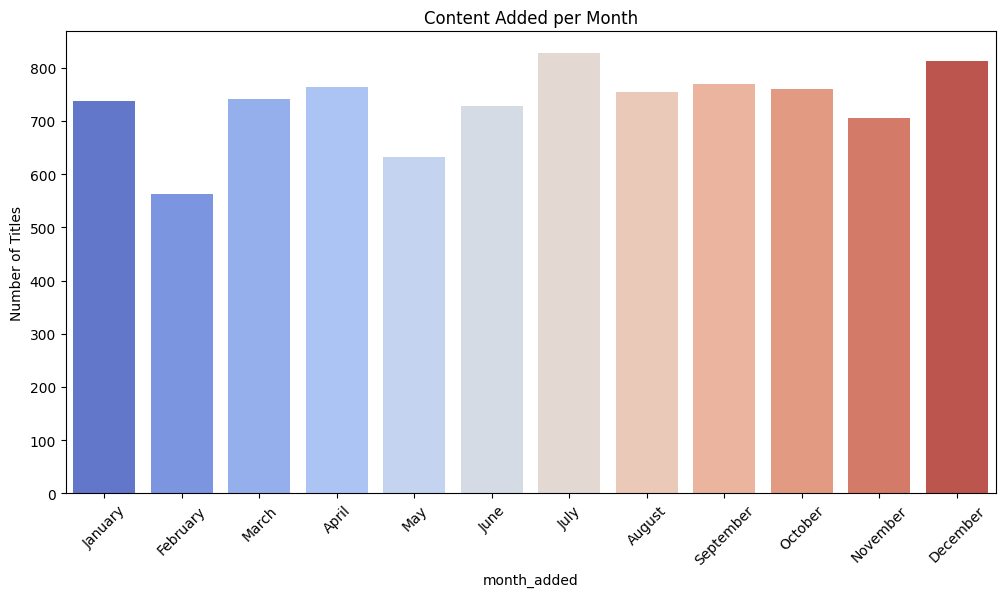

In [24]:
#Monthly Content Upload Trend
df['month_added'] = df['date_added'].dt.month_name()

monthly_additions = df['month_added'].value_counts().reindex([
    'January','February','March','April','May','June',
    'July','August','September','October','November','December'
])

plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_additions.index, y=monthly_additions.values, palette="coolwarm")
plt.title("Content Added per Month")
plt.xticks(rotation=45)
plt.ylabel("Number of Titles")
plt.show()

###  [Time Series of Monthly Uploads](#)  
This helps visualize how monthly uploads evolved over the years, pointing toward Netflix’s scaling strategies.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


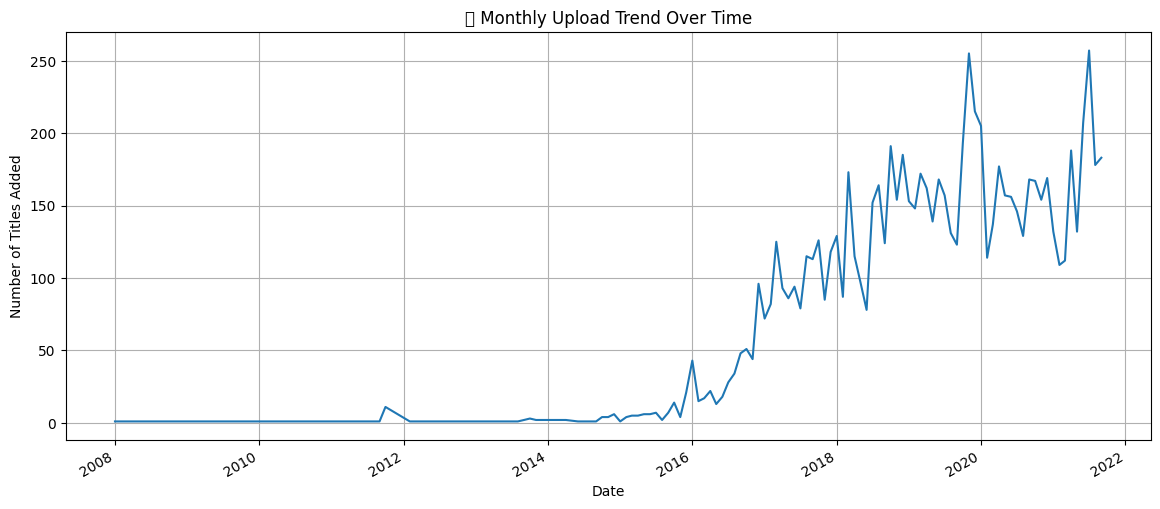

In [25]:
# Time Series of Monthly Uploads Over Years
monthly_trend = df.groupby(df['date_added'].dt.to_period('M')).size().to_timestamp()
plt.figure(figsize=(14,6))
monthly_trend.plot()
plt.title('📈 Monthly Upload Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Titles Added')
plt.grid(True)
plt.show()

###  [Genre Clustering (TF-IDF + KMeans)](#)  
Using machine learning, we cluster titles based on genre keywords to find similar genre groupings — a rare technique in EDA.

/tmp/ipython-input-26-485268975.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre_cluster', data=df, palette='Set2')
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


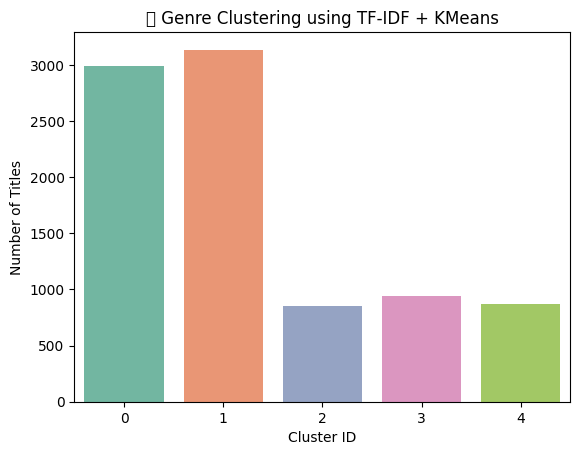

In [26]:
# Genre Clustering (Text-Based with TF-IDF + KMeans)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Fill missing genres
genre_data = df['listed_in'].fillna('Unknown')

# Vectorize
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(genre_data)

# Cluster
kmeans = KMeans(n_clusters=5, random_state=42)
df['genre_cluster'] = kmeans.fit_predict(X)

# Visualize cluster counts
sns.countplot(x='genre_cluster', data=df, palette='Set2')
plt.title('🎭 Genre Clustering using TF-IDF + KMeans')
plt.xlabel('Cluster ID')
plt.ylabel('Number of Titles')
plt.show()

###  [Stacked Area Chart: Movie vs TV Show](#)  
This chart visually explains how the content mix (Movies vs Shows) changed over time.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128250 (\N{TELEVISION}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


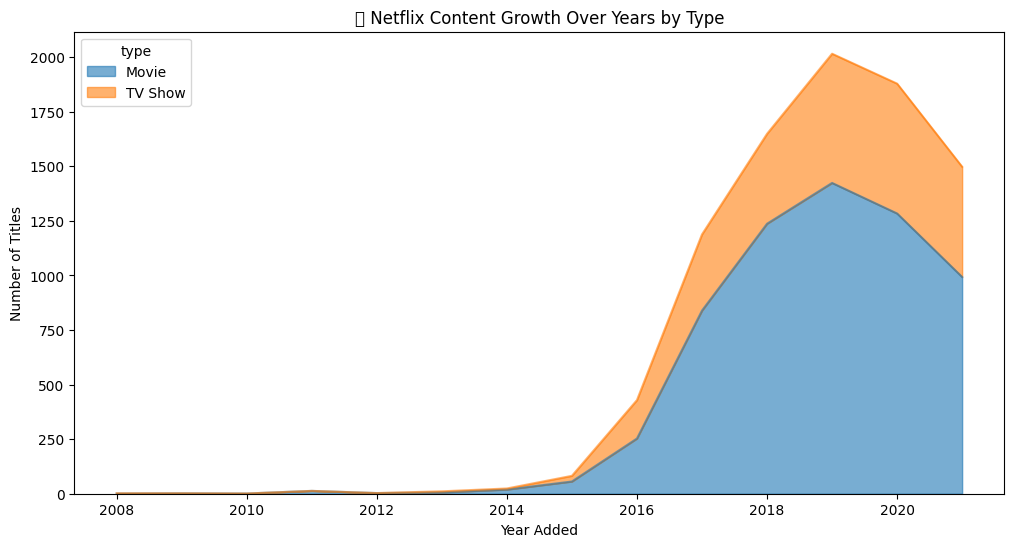

In [27]:
#Stacked Area Chart: Movie vs TV Show Over Time
type_trend = df.groupby(['year_added', 'type']).size().unstack().fillna(0)
type_trend.plot.area(figsize=(12,6), alpha=0.6)
plt.title("📺 Netflix Content Growth Over Years by Type")
plt.ylabel("Number of Titles")
plt.xlabel("Year Added")
plt.show()

In [28]:
!pip install plotly

### [Interactive Heatmap with Plotly](#)  
A sleek, interactive heatmap to explore year/month combinations dynamically.


In [29]:
# Heatmap
import plotly.express as px

# Preprocess country data
country_data = df['country'].dropna().str.split(', ')
all_countries = country_data.explode()
country_counts = all_countries.value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Plotly Choropleth Map
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='🌍 Netflix Content by Country',
)
fig.show()

In [30]:
!pip install networkx

###  [Network Graph of Country-Genre Links](#)  
Using network graphs, we connect genres and countries, revealing their co-occurrence relationships across Netflix content.


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 127917 (\N{PERFORMING ARTS}) missing from font(s) DejaVu Sans.



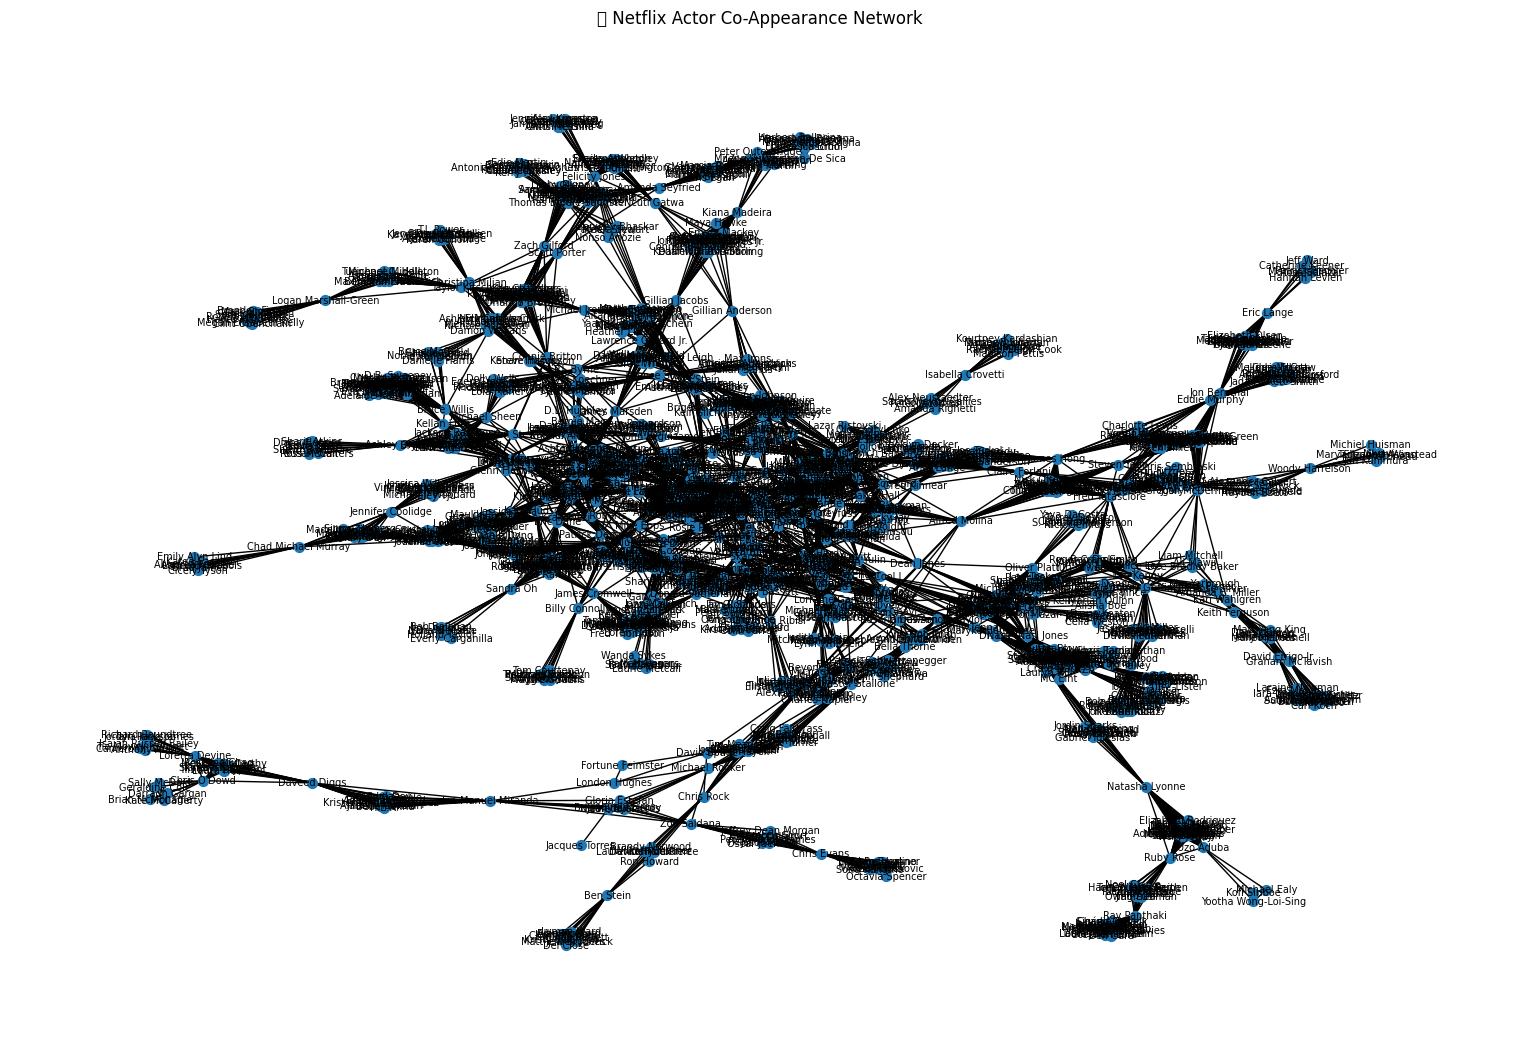

In [31]:
#Network Graph
import networkx as nx
import matplotlib.pyplot as plt

# Take top 500 shows with cast info
top_cast_df = df.dropna(subset=['cast']).head(500)

# Initialize graph
G = nx.Graph()

# Build edges based on shared shows
for cast_list in top_cast_df['cast']:
    actors = [a.strip() for a in cast_list.split(',')]
    for i in range(len(actors)):
        for j in range(i+1, len(actors)):
            G.add_edge(actors[i], actors[j])

# Draw only largest connected component
largest_cc = max(nx.connected_components(G), key=len)
subgraph = G.subgraph(largest_cc).copy()

plt.figure(figsize=(15, 10))
pos = nx.spring_layout(subgraph, k=0.3)
nx.draw(subgraph, pos, node_size=50, with_labels=True, font_size=7)
plt.title("🎭 Netflix Actor Co-Appearance Network")
plt.show()

##  [Conclusion](#)

This project offered a deeper look into how Netflix curates and distributes its content globally. Through exploratory data analysis and creative visualizations, we uncovered meaningful patterns around:

- Temporal trends (yearly, monthly, and weekly uploads)
- Popular genres, actors, and directors
- Duration characteristics across movies and shows
- Geographic and genre diversity
- Machine learning–based genre clustering

Netflix’s content strategy appears highly dynamic — responding to user preferences while expanding globally across genres and regions.

This notebook has not only strengthened my data analysis and visualization skills, but also deepened my appreciation for storytelling through data.

— *G.N. Himaja*  